In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap_hbb.json') as f:
  pmap = json.load(f)

#del pmap['ggF-powheg']
#del pmap['muondata']
#del pmap['data']

In [3]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.2

year='2017'

In [4]:
# Read in files with no selection
indir = "../outfiles/notrigger/chunksize100000_noselection_noSF/"
infiles = subprocess.getoutput("ls "+indir+year+"*.coffea").split()
outsum_nosel = processor.dict_accumulator()

# Check if pickle exists, remove it if it does                                                                             
picklename = str(year)+'/templates.pkl'
if os.path.isfile(picklename):
    os.remove(picklename)
    
started = 0
for filename in infiles:

    print("Loading "+filename)

    if os.path.isfile(filename):
        out = util.load(filename)

        if started == 0:
            outsum_nosel['templates'] = out['templates']
            outsum_nosel['sumw'] = out['sumw']
            started += 1
        else:
            outsum_nosel['templates'].add(out['templates'])
            outsum_nosel['sumw'].add(out['sumw'])
    
        del out

Loading ../outfiles/notrigger/chunksize100000_noselection_noSF/2017_dask_data.coffea
Loading ../outfiles/notrigger/chunksize100000_noselection_noSF/2017_dask_higgs.coffea
Loading ../outfiles/notrigger/chunksize100000_noselection_noSF/2017_dask_qcd.coffea
Loading ../outfiles/notrigger/chunksize100000_noselection_noSF/2017_dask_top.coffea
Loading ../outfiles/notrigger/chunksize100000_noselection_noSF/2017_dask_wandvv.coffea
Loading ../outfiles/notrigger/chunksize100000_noselection_noSF/2017_dask_z.coffea


In [5]:
# Create template out of no selection events
scale_lumi_nosel = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum_nosel['sumw'].items()}
outsum_nosel['templates'].scale(scale_lumi_nosel, 'dataset')

templates_nosel = outsum_nosel['templates'].group('dataset', hist.Cat('process', 'Process'), pmap)

In [6]:
# Read in files with selection
indir = "../outfiles/notrigger/chunksize100000_noSF/"
infiles = subprocess.getoutput("ls "+indir+year+"*.coffea").split()
outsum_sel = processor.dict_accumulator()

# Check if pickle exists, remove it if it does                                                                             
picklename = str(year)+'/templates.pkl'
if os.path.isfile(picklename):
    os.remove(picklename)
    
started = 0
for filename in infiles:

    print("Loading "+filename)

    if os.path.isfile(filename):
        out = util.load(filename)

        if started == 0:
            outsum_sel['templates'] = out['templates']
            outsum_sel['sumw'] = out['sumw']
            started += 1
        else:
            outsum_sel['templates'].add(out['templates'])
            outsum_sel['sumw'].add(out['sumw'])
    
        del out

Loading ../outfiles/notrigger/chunksize100000_noSF/2017_dask_data.coffea
Loading ../outfiles/notrigger/chunksize100000_noSF/2017_dask_higgs.coffea
Loading ../outfiles/notrigger/chunksize100000_noSF/2017_dask_qcd.coffea
Loading ../outfiles/notrigger/chunksize100000_noSF/2017_dask_top.coffea
Loading ../outfiles/notrigger/chunksize100000_noSF/2017_dask_wandvv.coffea
Loading ../outfiles/notrigger/chunksize100000_noSF/2017_dask_z.coffea


In [7]:
# Create template out of selection events
scale_lumi_sel = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum_sel['sumw'].items()}
outsum_sel['templates'].scale(scale_lumi_sel, 'dataset')

templates_sel = outsum_sel['templates'].group('dataset', hist.Cat('process', 'Process'), pmap)

In [12]:
pt_region = 450
#sig_eff = 5.143669484093437e-05
sig_eff = 0.00013582442772323638
N_bkg = templates_sel['bkg'].integrate('region','signal').sum('genflavor', 'process', 'msd1').integrate('pt1',int_range=slice(pt_region,1200)).integrate('ddb1',int_range=slice(0,1)).values()[()]
print(N_bkg)
sig_eff / (1 + np.sqrt(N_bkg))

6120451.282587906


5.4879563695263095e-08

In [10]:
list(outsum_sel['sumw'].items())

[('ZH_HToBB_ZToQQ_M125_13TeV_powheg_pythia8', 270592.0),
 ('ggZH_HToBB_ZToQQ_M125_13TeV_powheg_pythia8', 7788.81689453125),
 ('GluGluHToBB_M125_TuneCP5_13TeV-powheg-pythia8', 206514439.0),
 ('WplusH_HToBB_WToLNu_M125_13TeV_powheg_pythia8', 692050.416015625),
 ('WminusH_HToBB_WToQQ_M125_13TeV_powheg_pythia8', 177231.8125),
 ('WminusH_HToBB_WToLNu_M125_13TeV_powheg_pythia8', 419587.41015625),
 ('GluGluHToBB_M-125_13TeV_powheg_MINLO_NNLOPS_pythia8', 144239459.5),
 ('ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8', 403494.765625),
 ('ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8', 4216319.6875),
 ('ggZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8', 17607.90185546875),
 ('WplusH_HToBB_WToQQ_M125_13TeV_powheg_pythia8', 295614.640625),
 ('ggZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8', 72191.8134765625),
 ('VBFHToBB_M-125_13TeV_powheg_pythia8_weightfix', 19299381.5),
 ('ZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8', 382052.78369140625),
 ('QCD_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8', 11508604.0),
 ('QCD_HT

Sig. sel. eff. for msd > 105 && msd < 145
pass pt > 350: 0.557088202298999
pass pt > 450: 0.3864236720657009

Punzi signf. x 1000
pass pt > 350: 9.483819691451139
pass pt > 450: 8.169621641353215

Sig. sel. eff. for msd > 105 && msd < 145
fail pt > 350: 0.2588498922508424
fail pt > 450: 0.16631720680494166

Punzi signf. x 1000
fail pt > 350: 0.18334989002152474
fail pt > 450: 0.14806576257057255



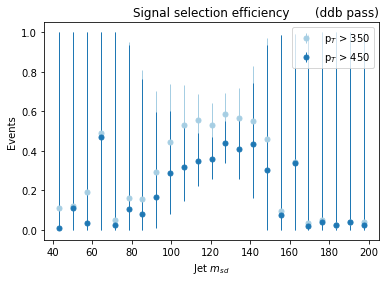

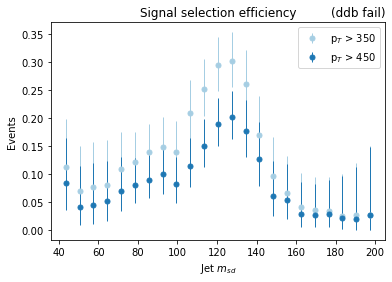

In [8]:
def sig_sel_eff(h_sel, h_nosel):
    N_sel = h_sel.sum('process').integrate('msd1', slice(105, 145)).values()[()]
    N_nosel = h_nosel.sum('process').integrate('msd1', slice(105, 145)).values()[()]
    return N_sel/N_nosel


# Analysis has maximum sensitivity when punzi significance reaches maximum
def punzi(sig_eff, templates, pt_region, ddb_l, ddb_r, pt_region_2=-1):
    if (pt_region_2 > pt_region):
        N_bkg = templates['bkg'].integrate('region','signal').sum('genflavor', 'process').integrate('pt1',int_range=slice(pt_region,1200)).integrate('ddb1',int_range=slice(ddb_l,ddb_r)).integrate('msd1', slice(105, 145)).values()[()]
    else:
        N_bkg = templates['bkg'].integrate('region','signal').sum('genflavor', 'process').integrate('pt1',int_range=slice(pt_region,1200)).integrate('ddb1',int_range=slice(ddb_l,ddb_r)).integrate('msd1', slice(105, 145)).values()[()]
    return sig_eff / (1 + np.sqrt(N_bkg))

ddb_regions = ["pass", "fail"]

for ddb_region in ddb_regions:
    if ddb_region == 'pass':
        ddb_l = 0.64
        ddb_r = 1
    elif ddb_region == 'fail':
        ddb_l = 0
        ddb_r = 0.64

    # Histogram of signal with no selection
    h_nosel = templates_nosel['H(bb)'].integrate('region','noselection').sum('genflavor', 'pt1').integrate('ddb1',int_range=slice(ddb_l,ddb_r))
        
    # Histogram of signal with selection (pt > 350)  
    pt_region = 350
    h_sel_pt350 = templates_sel['H(bb)'].integrate('region','signal').sum('genflavor').integrate('pt1',int_range=slice(pt_region,1200)).integrate('ddb1',int_range=slice(ddb_l,ddb_r))

    # Histogram of signal with selection (pt > 450) 
    pt_region = 450
    h_sel_pt450 = templates_sel['H(bb)'].integrate('region','signal').sum('genflavor').integrate('pt1',int_range=slice(pt_region,1200)).integrate('ddb1',int_range=slice(ddb_l,ddb_r))

    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': '#a6cee3',
            'elinewidth': 1,
        }
    
    # Plot ratio of with selection (pt > 350) and no selection
    fig, ax = plt.subplots(1, 1)
    hist.plotratio(
            num=h_sel_pt350.sum("process"),
            denom=h_nosel.sum("process"),
            clear=False,
            ax=ax,
            error_opts=data_err_opts,
            label=r'p$_T$ > 350'
        )
    
    data_err_opts['color'] = '#1f78b4'
    
    # Plot ratio of with selection (pt > 450) and no selection
    hist.plotratio(
            num=h_sel_pt450.sum("process"),
            denom=h_nosel.sum("process"),
            clear=False,
            ax=ax,
            error_opts=data_err_opts,
            label=r'p$_T$ > 450',
            unc='clopper-pearson'
        )
    
    leg = ax.legend()
    ax.set_title('(ddb {0})'.format(ddb_region), loc='right')
    ax.set_title('Signal selection efficiency')
    
    # Compute signal selection efficiency in signal region (msd > 105 && msd < 145)
    sig_sel_eff_350 = sig_sel_eff(h_sel_pt350, h_nosel)
    sig_sel_eff_450 = sig_sel_eff(h_sel_pt450, h_nosel)
    
    # Compute punzi significance
    punzi_350 = punzi(sig_sel_eff_350, templates_sel, 350, ddb_l, ddb_r)
    punzi_450 = punzi(sig_sel_eff_450, templates_sel, 450, ddb_l, ddb_r)
    
    print('Sig. sel. eff. for msd > 105 && msd < 145')
    print('{0} pt > 350: {1}'.format(ddb_region, sig_sel_eff_350))
    print('{0} pt > 450: {1}\n'.format(ddb_region, sig_sel_eff_450))
    print('Punzi signf. x 1000')
    print('{0} pt > 350: {1}'.format(ddb_region, punzi_350*1000))
    print('{0} pt > 450: {1}\n'.format(ddb_region, punzi_450*1000))
    
    fig.savefig('../plots/sig_sel_eff/Hbb_' + ddb_region + '.png')

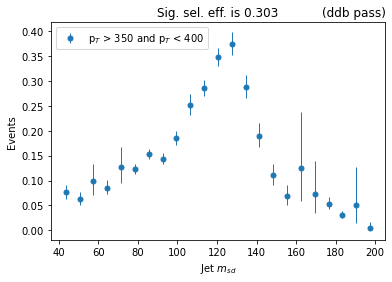

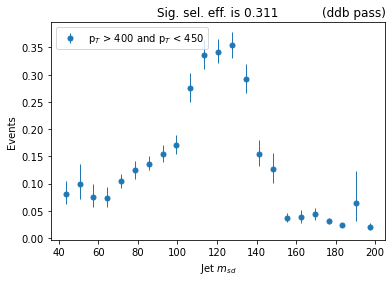

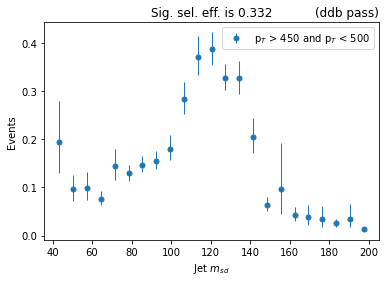

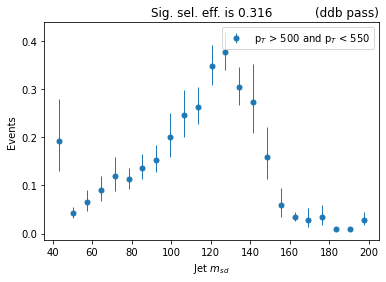

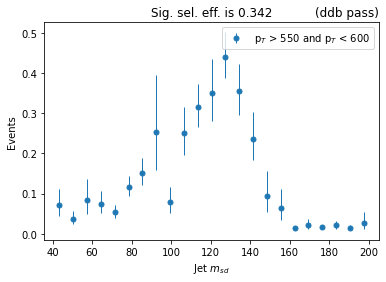

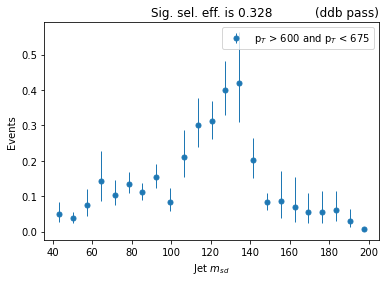

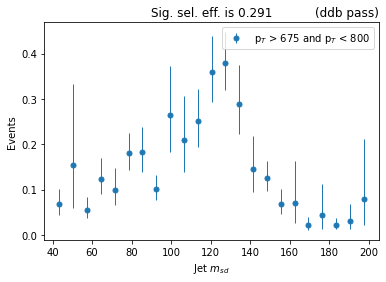

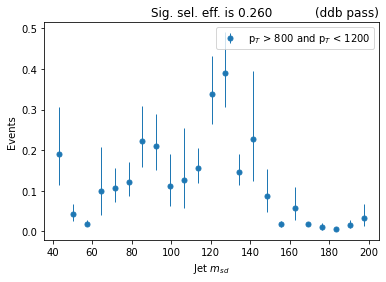

In [10]:
pt_bins = [350, 400, 450, 500, 550, 600, 675, 800, 1200]
ddb_regions = ["pass"]#, "fail"]

for ddb_region in ddb_regions:
    for i in range(len(pt_bins)-1):
        if ddb_region == 'pass':
            ddb_l = 0
            ddb_r = 1
        elif ddb_region == 'fail':
            ddb_l = 0
            ddb_r = 0.64

        # Histogram of signal with no selection
        h_nosel = templates_nosel['H(bb)'].integrate('pt1', slice(pt_bins[i], pt_bins[i+1])).integrate('region','noselection').sum('genflavor').integrate('ddb1',int_range=slice(ddb_l,ddb_r))

        # Histogram of signal with selection
        h_sel = templates_sel['H(bb)'].integrate('pt1', slice(pt_bins[i], pt_bins[i+1])).integrate('region','signal').sum('genflavor').integrate('ddb1',int_range=slice(ddb_l,ddb_r))

        data_err_opts = {
                'linestyle': 'none',
                'marker': '.',
                'markersize': 10.,
                'color': '#1f78b4',
                'elinewidth': 1,
            }

        # Plot ratio of with selection and no selection
        fig, ax = plt.subplots(1, 1)
        hist.plotratio(
                num=h_sel.sum("process"),
                denom=h_nosel.sum("process"),
                clear=False,
                ax=ax,
                error_opts=data_err_opts,
                label=r'p$_T$ > {0} and p$_T$ < {1}'.format(pt_bins[i], pt_bins[i+1]),
                unc='num'
            )
        
        # Compute signal selection efficiency in signal region (msd > 105 && msd < 145)
        sig_eff = sig_sel_eff(h_sel, h_nosel)
        
        # Compute punzi significance
        #punzi = punzi(sig_eff, templates_sel, 350, ddb_l, ddb_r)
        
        leg = ax.legend()
        ax.set_title('(ddb {0})'.format(ddb_region), loc='right')
        ax.set_title('Sig. sel. eff. is {:.3f}'.format(sig_eff))

        fig.savefig('../plots/sig_sel_eff/Hbb_pT' + str(pt_bins[i]) + 'to' + str(pt_bins[i+1]) + '_' + ddb_region + '.png')